# <font color='navy'> <i><b> Programming </i></b> </font>

**Stemfie-X** is a set of classes on top of the CadQuery library, which implement elementary objects and operations for working with kit objects.

Of course, it is possible to use all the capabilities of the [CadQuery](https://cadquery.readthedocs.io/en/latest/) library and the Python language. You can extend the library classes by inheriting and adding additional properties.

### <font color='purple'> <b> Library architecture </b></font>

```Python
# Typical Stemfie-X class, derived from base class Stemfie_X
class Hole(Stemfie_X):                     

     # constructor
    def __init__(self, length=1):  
        Stemfie_X.__init__(self)     

        # some operation over CadQuery stack
        self.obj = self.obj.self.obj.circle(self.Hole_Radius)

        # next operation
        self.obj = self.obj.OPERATION 
        ...
```
Library class diagram

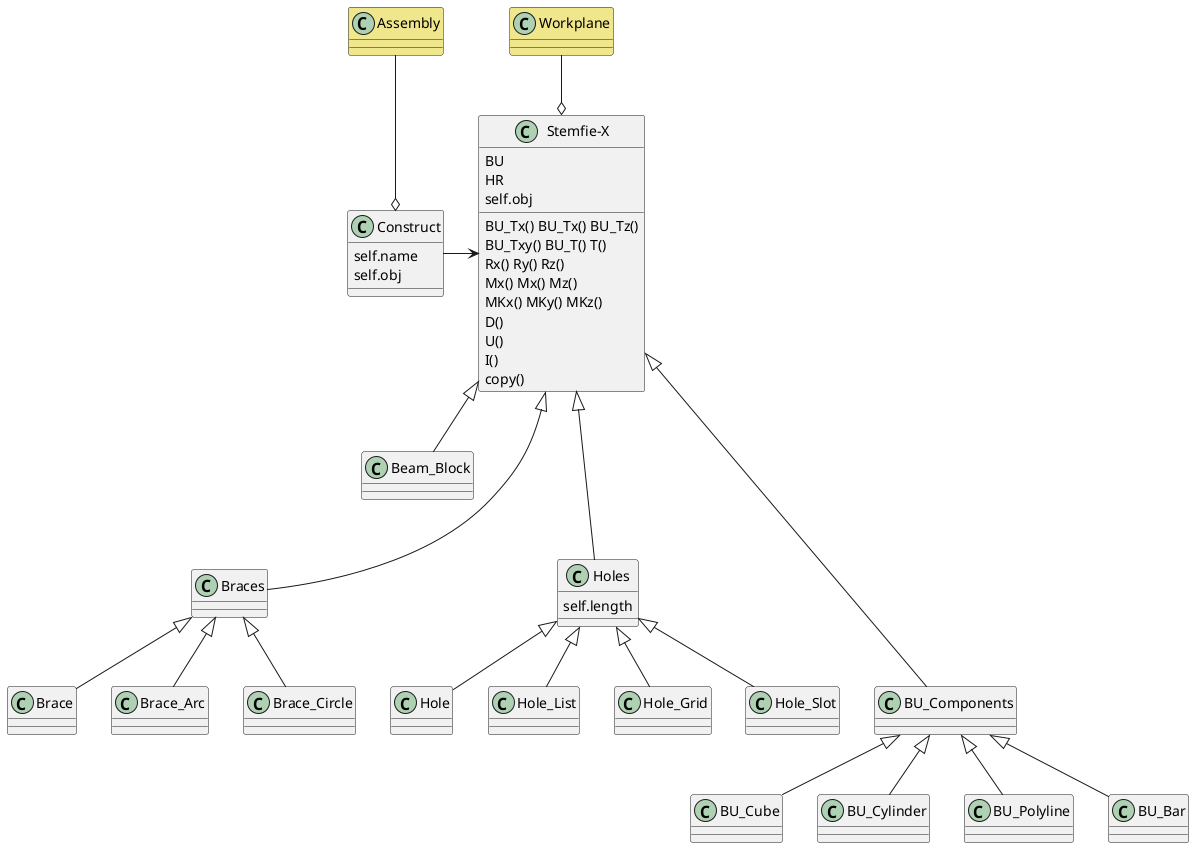

In [8]:
from IPython.display import Image
Image('./img/lib_stemfie.png', width=800)

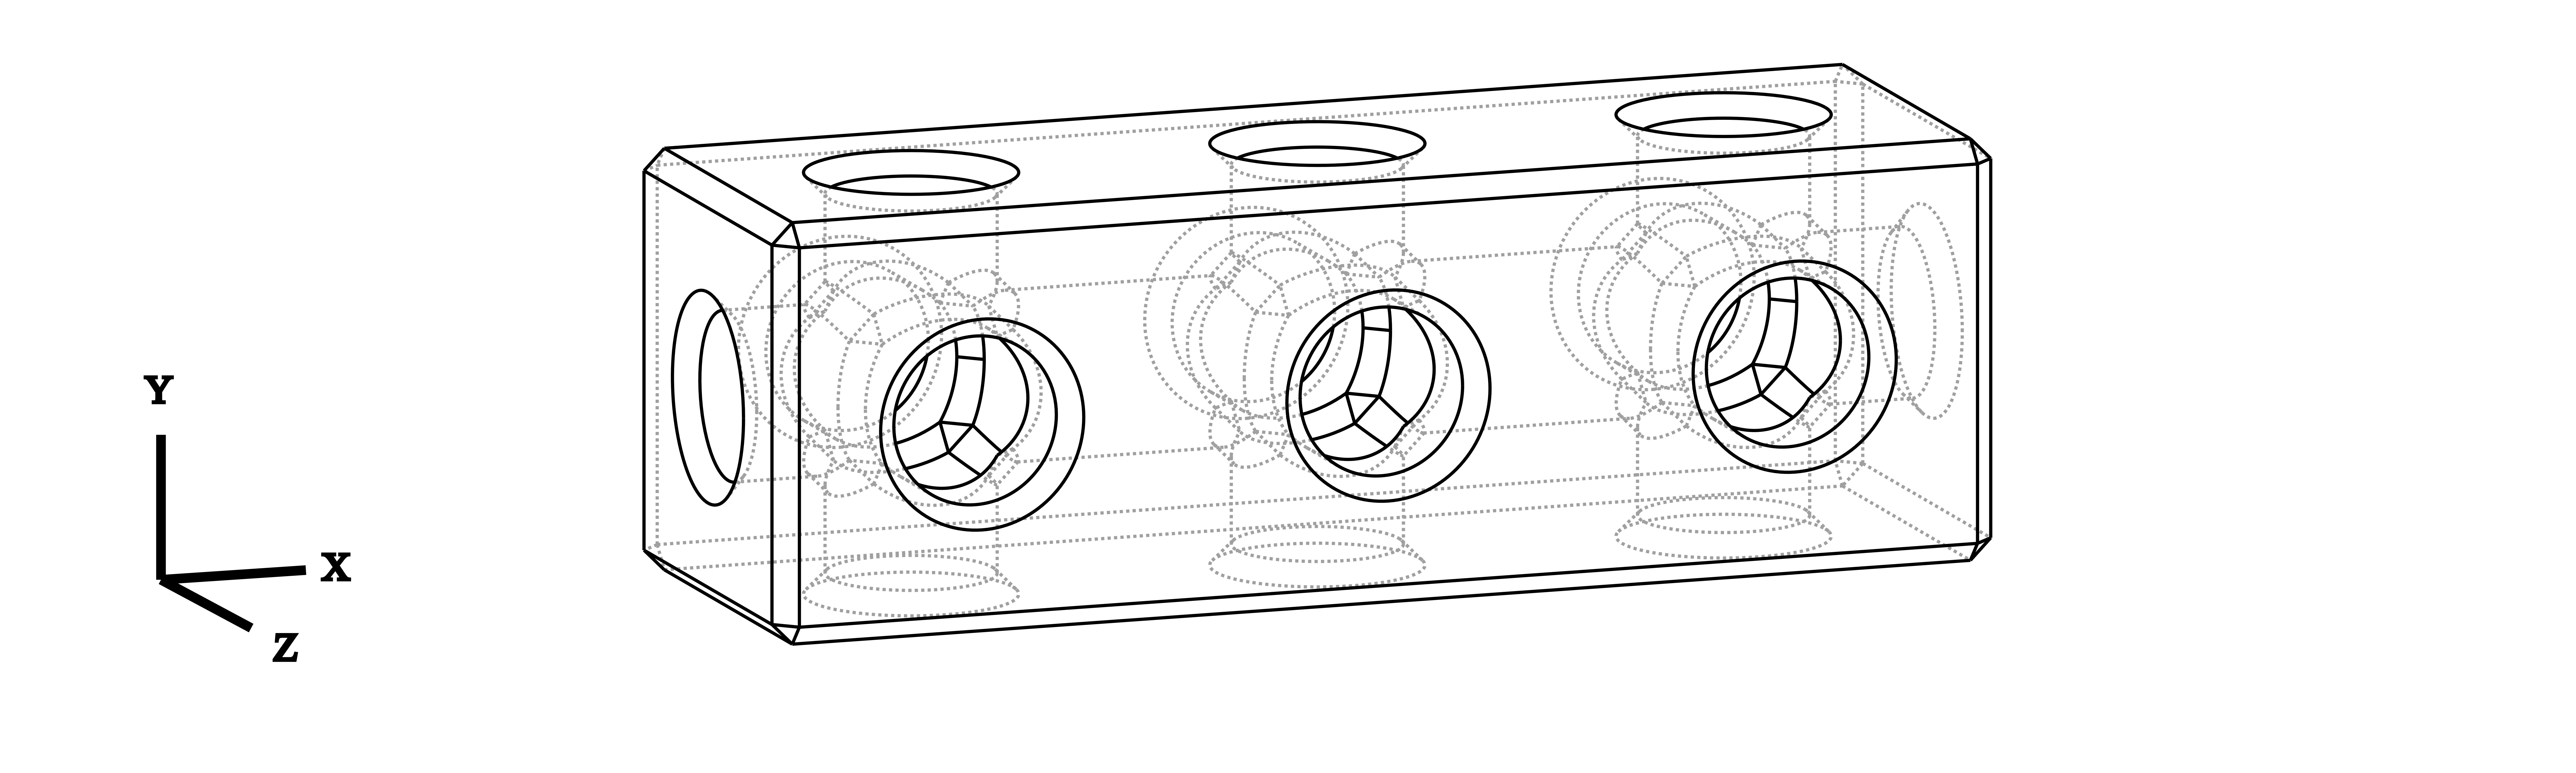

In [1]:
from lib import *

bs = Beam_Block(3)                   # Stemfie-X reference to object
bs.obj = bs.obj.faces().chamfer(.5)  # Use internal CadQuery reference and operation

convert_to_image(bs,'./img/prog_01')
Image('./img/prog_01.png', width=400)

### <font color='purple'> <b> Copies of objects </b></font>

Using an instance of a class, we create a standard Python reference to an object.
If we want to work with a copy of an object, we need to use the copy operation.


```Python
ba = Beam_Block(3)
bb = ba.BU_Tx(3)    # wrong, ba and bb are references to the same object
bc = ba.copy()      # bc is new object (deep copy)
```

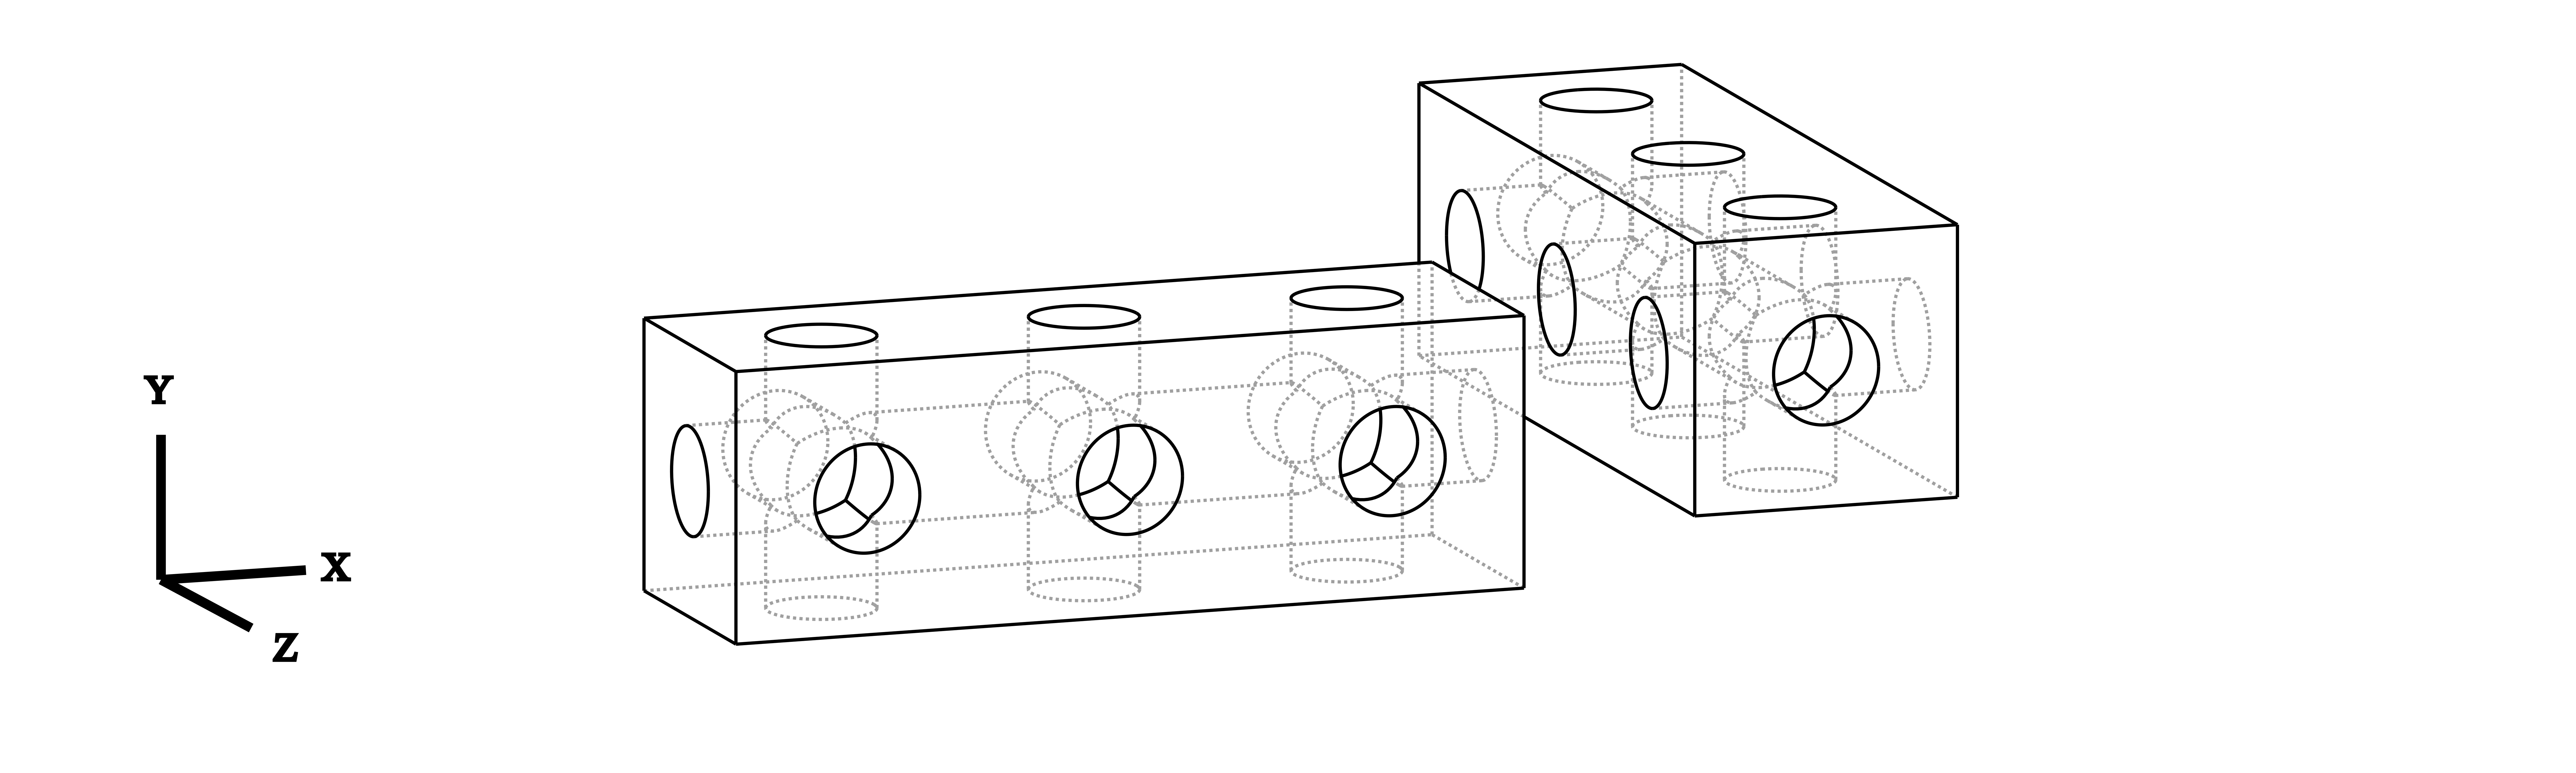

In [2]:
from lib import *

ba = Beam_Block(3)                   
bb = ba.copy()
bb.Ry().BU_Tx(4)

ba.U(bb)     # union for displaying objects together in one image in Jupyter Notebook
convert_to_image(ba,'./img/prog_02')
Image('./img/prog_02.png', width=600)

### <font color='purple'> <b> Class inheritance </b></font>

Using class inheritance, you can create your own parametric object classes using all the features of the Stemfie-X library and, of course, CadQuery.

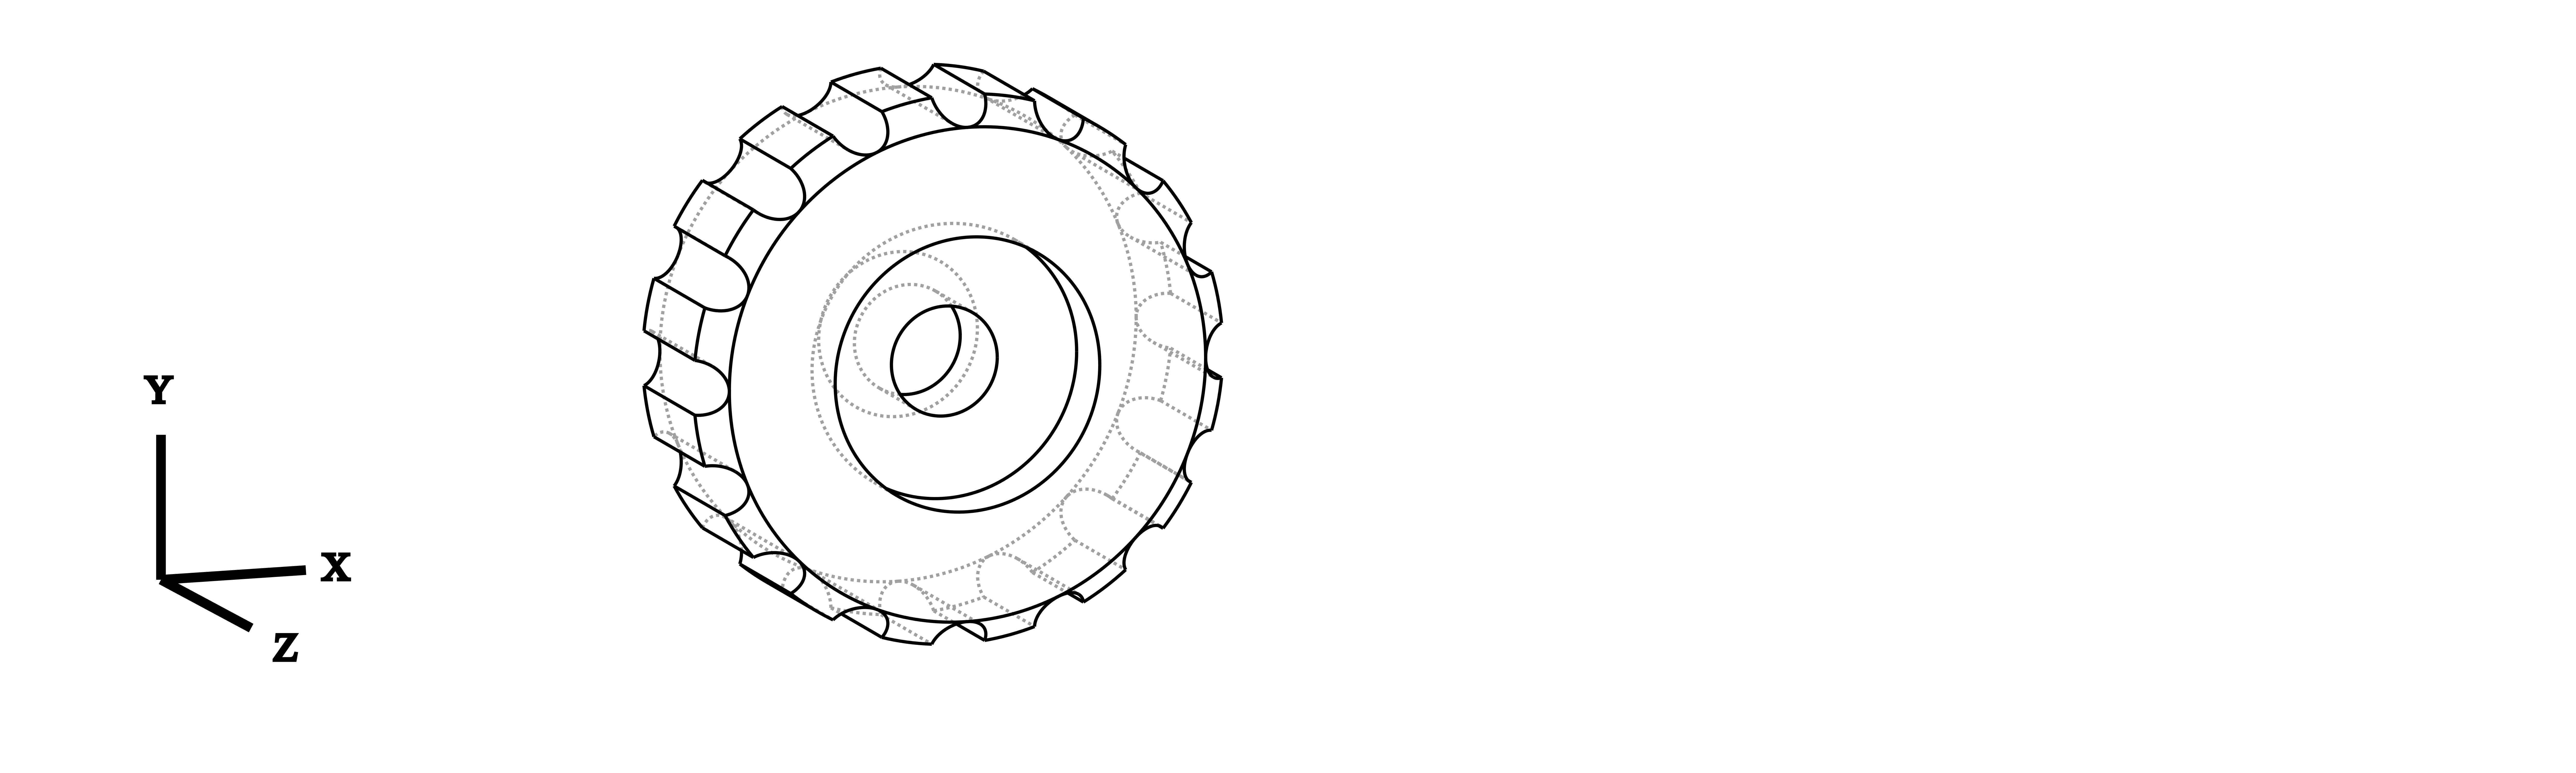

In [3]:
from lib import *
import numpy as np

class Simple_Wheel(Stemfie_X):
    # simple, non parametric class
    def __init__(self):
        # outer cylinder - Stemfie-X object
        w1 = BU_Cylinder(2, 1/2+1/4, hole=True)
        w1.obj= w1.obj.faces().chamfer(1)

        # inner cylinder
        w2 = BU_Cylinder(1, 1/4, hole=True).BU_Tz(1/2-1/4)
        w1.D(w2)

        # tire tread - using CadQuery 
        N = 16                         
        r = 10
        gamma = np.pi*2/N
        ds = cq.Workplane('XY')
        for n in range(N):
            hx = np.cos(gamma*n)*r
            hy = np.sin(gamma*n)*r
            ds = ds.moveTo(hx,hy)
            ds = ds.cylinder(20, 1)
        
        w1.obj = w1.obj.cut(ds)
        self.obj = w1.obj

w = Simple_Wheel()
convert_to_image(w,'./img/prog_03')
Image('./img/prog_03.png', width=700)

### <font color='purple'> <b> Export </b></font>

For further processing and 3D printing, we can export objects using standard [CadQuery](https://cadquery.readthedocs.io/en/latest/importexport.html#exporting-stl) methods to various output formats.

In [4]:
w2 = Simple_Wheel()
w2.export_stl('whell')
w2.export_step('whell')